In [4]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 5, 'hathodawala': 1, 'is': 2, 'looking': 4, 'for': 0, 'job': 3}

In [9]:
corpus = [
    "Thor ate pizza",
    "Loki is tall",
    "Loki is eating pizza"
]

In [11]:
import spacy
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text)
    
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
        
    return " ".join(filtered_tokens)

preprocess("Thor ate pizza")

'thor eat pizza'

In [14]:
corpus_processed = [preprocess(text) for text in corpus]
corpus_processed

['thor eat pizza', 'Loki tall', 'Loki eat pizza']

In [15]:
v = CountVectorizer(ngram_range= (1,2))
v.fit(corpus_processed)
v.vocabulary_

{'thor': 7,
 'eat': 0,
 'pizza': 5,
 'thor eat': 8,
 'eat pizza': 1,
 'loki': 2,
 'tall': 6,
 'loki tall': 4,
 'loki eat': 3}

In [19]:
v.transform(["Thor eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 1, 1]], dtype=int64)

In [18]:
v.transform(["Hulk eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

![Image Alt Text](Capture.png)

In [22]:
import pandas as pd

df = pd.read_json("news_dataset.json")
print(df.shape)
df.head()

(12695, 2)


,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [24]:
 df.category.value_counts()

category
BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: count, dtype: int64

In [27]:
min_samples = 1381

df_business = df[df.category == "BUSINESS"].sample(min_samples, random_state = 2022 )
df_sports  = df[df.category == "SPORTS"].sample(min_samples, random_state = 2022)
df_crime  = df[df.category == "CRIME"].sample(min_samples, random_state = 2022)
df_science  = df[df.category == "SCIENCE"].sample(min_samples, random_state = 2022)

In [31]:
df_balanced = pd.concat([df_business, df_sports, df_crime, df_science], axis = 0)
df_balanced.category.value_counts()

category
BUSINESS    1381
SPORTS      1381
CRIME       1381
SCIENCE     1381
Name: count, dtype: int64

In [41]:
Target ={"BUSINESS": 0 , "SPORTS":1 , "CRIME" : 2, "SCIENCE" : 3 }
df_balanced["category_num"] = df_balanced.category.map(Target)

In [52]:
df_balanced.head()

,text,category,category_num
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0
502,How to Market Your Business While Traveling th...,BUSINESS,0
5279,How to Leverage Intuition in Decision-making I...,BUSINESS,0


In [70]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_balanced.text, 
                                                    df_balanced.category , 
                                                    test_size = 0.2,
                                                    random_state= 2021,
                                                    stratify=df_balanced.category_num
                                                   )

In [71]:
x_train.shape

(4419,)

In [72]:
x_test.shape

(1105,)

In [73]:
x_train.head()

3221     Katy Perry To Perform The First Shoppable Supe...
8478     Mom Allegedly Suffocated Baby, Posted RIP Pic ...
12404    You're Not a Chimpanzee, So Don't Make Love Li...
7830     Conflict On The Surface: An Excerpt from 'The ...
8792     Olympic Race Walker Steps Up To Propose To His...
Name: text, dtype: object

In [74]:
y_train.value_counts()

category
SPORTS      1105
CRIME       1105
SCIENCE     1105
BUSINESS    1104
Name: count, dtype: int64

In [75]:
y_test.value_counts()

category
BUSINESS    277
SCIENCE     276
SPORTS      276
CRIME       276
Name: count, dtype: int64

Attempt 1 : Use 1-gram which is nothing but a Bag Of Words (BOW) model

In [77]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [87]:
classifier = Pipeline([
    ('vectorizer_bow', CountVectorizer()),
    ('Multi NB',MultinomialNB())
    
])
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    BUSINESS       0.74      0.87      0.80       277
       CRIME       0.89      0.86      0.88       276
     SCIENCE       0.88      0.80      0.84       276
      SPORTS       0.90      0.83      0.87       276

    accuracy                           0.84      1105
   macro avg       0.85      0.84      0.84      1105
weighted avg       0.85      0.84      0.84      1105



In [90]:
classifier = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1,2))),
    ('Multi NB',MultinomialNB())
    
])
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    BUSINESS       0.67      0.91      0.77       277
       CRIME       0.89      0.84      0.86       276
     SCIENCE       0.91      0.78      0.84       276
      SPORTS       0.92      0.76      0.84       276

    accuracy                           0.82      1105
   macro avg       0.85      0.82      0.83      1105
weighted avg       0.85      0.82      0.83      1105



In [91]:
df_balanced["processed_text"] = df_balanced.text.apply(preprocess)

In [92]:
df_balanced.head()

,text,category,category_num,processed_text
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0,GCC Business Leaders remain Confident Face Reg...
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0,Honest Review employee wake morning love impor...
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0,Mike McDerment ceo FreshBooks Talks give build...
502,How to Market Your Business While Traveling th...,BUSINESS,0,market business travel World recently amazing ...
5279,How to Leverage Intuition in Decision-making I...,BUSINESS,0,Leverage intuition decision making feel safe r...


In [94]:
x_train, x_test, y_train, y_test = train_test_split(df_balanced.processed_text, 
                                                    df_balanced.category , 
                                                    test_size = 0.2,
                                                    random_state= 2021,
                                                    stratify=df_balanced.category_num
                                                   )

In [95]:
classifier = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1,2))),
    ('Multi NB',MultinomialNB())
    
])
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    BUSINESS       0.80      0.89      0.85       277
       CRIME       0.86      0.90      0.88       276
     SCIENCE       0.93      0.82      0.87       276
      SPORTS       0.91      0.88      0.89       276

    accuracy                           0.87      1105
   macro avg       0.88      0.87      0.87      1105
weighted avg       0.88      0.87      0.87      1105



In [97]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[247,  12,  10,   8],
       [ 16, 249,   4,   7],
       [ 25,  15, 227,   9],
       [ 19,  12,   3, 242]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

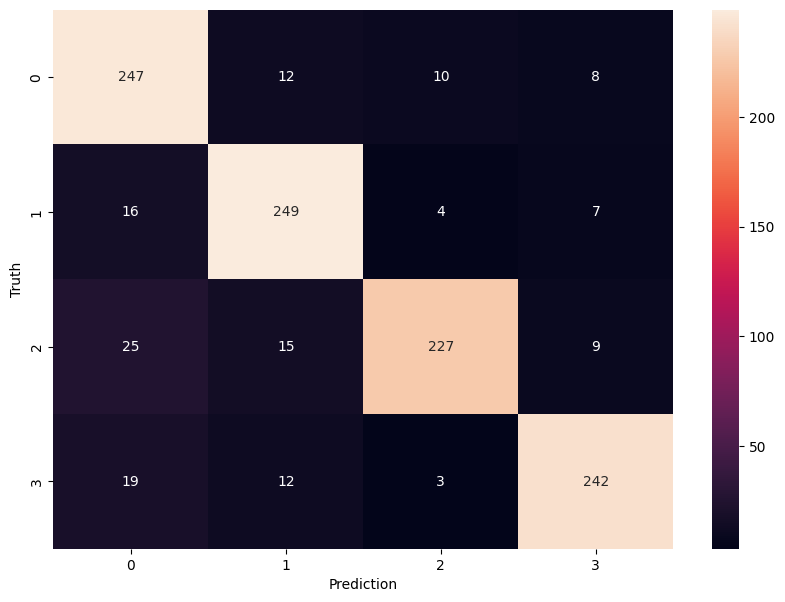

In [100]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [2]:
import pandas as pd

In [4]:
df = pd.read_csv("Fake_Real_Data.csv")
df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [5]:
df.shape

(9900, 2)

In [16]:
df["label_num"] = df["label"].apply(lambda x:1 if x == "Real" else 0)
df.head()

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


In [18]:
df.head()

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


In [21]:
df.label_num.value_counts()

label_num
0    5000
1    4900
Name: count, dtype: int64

In [26]:
sample_min =4900
df_real = df[df["label"] == "Real"].sample(sample_min, random_state =2022)
df_fake = df[df["label"] == "Fake"].sample(sample_min, random_state =2022)
df_new = pd.concat([df_real,df_fake], axis = 0)

In [28]:
df_new.label.value_counts()

label
Real    4900
Fake    4900
Name: count, dtype: int64

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_new.Text, 
                                                    df_new.label_num, 
                                                    test_size = 0.2, 
                                                    random_state = 2022,
                                                    stratify = df_new.label_num
                                                   )

In [34]:
x_train.shape, y_train.shape

((7840,), (7840,))

In [33]:
x_test.shape, y_test.shape

((1960,), (1960,))

In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from  sklearn.neighbors import KNeighborsClassifier

In [44]:
clf = Pipeline([
    ("vectorization", CountVectorizer(ngram_range = (1,3))),
    ("model",KNeighborsClassifier(n_neighbors=10, metric = 'euclidean'))
])
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.46      0.62       980
           1       0.65      0.98      0.78       980

    accuracy                           0.72      1960
   macro avg       0.80      0.72      0.70      1960
weighted avg       0.80      0.72      0.70      1960



In [46]:
clf1 = Pipeline([
    ("vectorization", CountVectorizer(ngram_range = (1,3))),
    ("model",KNeighborsClassifier(n_neighbors=10, metric = 'cosine'))
])
clf1.fit(x_train,y_train)
y_pred = clf1.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.56      0.71       980
           1       0.69      1.00      0.82       980

    accuracy                           0.78      1960
   macro avg       0.85      0.78      0.77      1960
weighted avg       0.85      0.78      0.77      1960



In [48]:
clf2 = Pipeline([
    ("vectorization", CountVectorizer(ngram_range = (3,3))),
    ("model",RandomForestClassifier())
])
clf2.fit(x_train,y_train)
y_pred = clf2.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99       980

    accuracy                           0.99      1960
   macro avg       0.99      0.99      0.99      1960
weighted avg       0.99      0.99      0.99      1960



In [52]:
clf3 = Pipeline([
    ("vectorization", CountVectorizer(ngram_range = (1,2))),
    ("model",MultinomialNB(alpha = 0.75))
])
clf3.fit(x_train,y_train)
y_pred = clf3.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.98      0.99       980

    accuracy                           0.99      1960
   macro avg       0.99      0.99      0.99      1960
weighted avg       0.99      0.99      0.99      1960



Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [55]:
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [56]:
df_new["processed_text"] = df_new.Text.apply(preprocess)

In [59]:
df_new.head()

,Text,label,label_num,processed_text
5225,Russia to respond to Twitter ban on Russian me...,Real,1,Russia respond Twitter ban russian medium ad R...
1572,Senate panel advances nomination of Quarles to...,Real,1,Senate panel advance nomination Quarles Fed bo...
8186,Senate approves two FCC nominees as it reviews...,Real,1,Senate approve FCC nominee review Obama rule W...
2495,Fellow Republicans assail Trump after he defen...,Real,1,Fellow Republicans assail Trump defend Confede...
6608,Senate banking chair wants financial rules ref...,Real,1,Senate banking chair want financial rule refor...


In [61]:
x_train, x_test, y_train, y_test = train_test_split(df_new.processed_text, 
                                                    df_new.label_num, 
                                                    test_size = 0.2, 
                                                    random_state = 2022,
                                                    stratify = df_new.label_num
                                                   )

In [63]:
clf_1 = Pipeline([
    ("vectorization", CountVectorizer(ngram_range = (3,3))),
    ("model",RandomForestClassifier())
])
clf_1.fit(x_train,y_train)
y_pred = clf_1.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       980
           1       0.98      0.91      0.95       980

    accuracy                           0.95      1960
   macro avg       0.95      0.95      0.95      1960
weighted avg       0.95      0.95      0.95      1960



In [67]:
clf_2 = Pipeline([
    ("vectorization", CountVectorizer(ngram_range = (1,3))),
    ("model",RandomForestClassifier())
])
clf_2.fit(x_train,y_train)
y_pred = clf_2.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      0.99      1.00       980

    accuracy                           1.00      1960
   macro avg       1.00      1.00      1.00      1960
weighted avg       1.00      1.00      1.00      1960



In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[964,  16],
       [ 87, 893]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

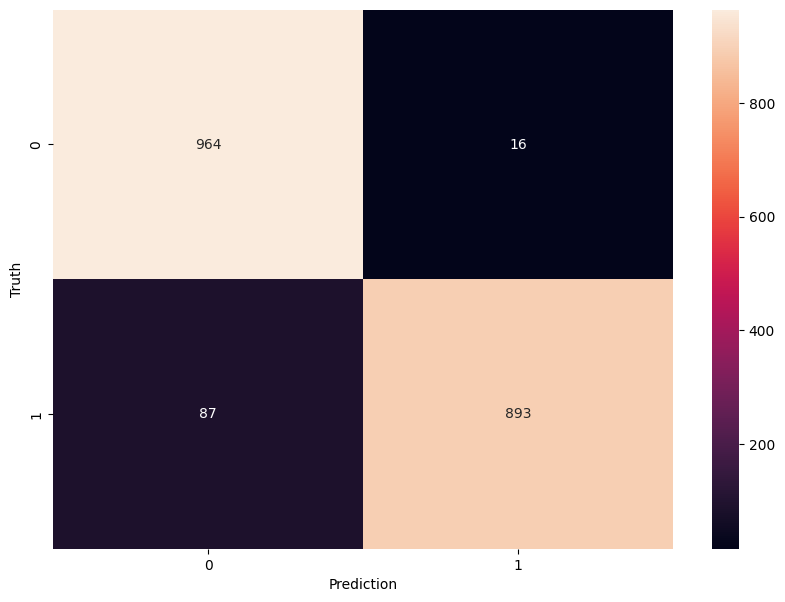

In [66]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')